In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def npy_loader(path):
    return torch.from_numpy(np.load(path))

## Bold Data Base

In [5]:
BoldTrainDataImages = npy_loader("BoldArrowsDataBase\\BoldTrainDataImages.npy")
BoldTrainDataLables = npy_loader("BoldArrowsDataBase\\BoldTrainDataLables.npy")
BoldTestDataImages = npy_loader("BoldArrowsDataBase\\BoldTestDataImages.npy")
BoldTestDataLables = npy_loader("BoldArrowsDataBase\\BoldTestDataLables.npy")


## Thin Data Base

In [6]:
ThinTrainDataImages = npy_loader("ThinArrowsDataBase\\ThinTrainDataImages.npy")
ThinTrainDataLables = npy_loader("ThinArrowsDataBase\\ThinTrainDataLables.npy")
ThinTestDataImages = npy_loader("ThinArrowsDataBase\\ThinTestDataImages.npy")
ThinTestDataLables = npy_loader("ThinArrowsDataBase\\ThinTestDataLables.npy")

In [8]:
BoldTrainDataImages[0].shape

torch.Size([28, 28])

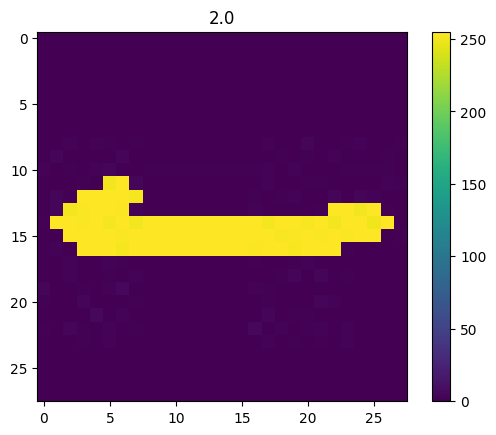

In [11]:
plt.imshow(BoldTrainDataImages[0].numpy())
plt.title(BoldTrainDataLables[0].numpy())
plt.colorbar()
plt.show()

Lables

0 = SetaBaixo;
1 = SetaCima;
2 = SetaEsquerda;
3 = SetaDireita;

In [16]:
BoldTrainDataLables.shape

torch.Size([3200])

In [80]:
BoldTrainDataLables_OneHot = F.one_hot(BoldTrainDataLables.to(torch.int64),num_classes=4)
BoldTrainDataLables_OneHot

tensor([[0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]])

In [18]:
BoldTrainDataImages.shape

torch.Size([3200, 28, 28])

In [19]:
BoldTrainDataImages.view(-1,28**2).shape

torch.Size([3200, 784])

## Dataset Object

In [85]:
def npy_loader(path):
    return torch.from_numpy(np.load(path))

class CTDataset(Dataset):
    def __init__(self, filepathImg, filepathLables):
        self.x = npy_loader(filepathImg).to(torch.float32)
        self.y = npy_loader(filepathLables)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y.to(torch.int64), num_classes=4).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [86]:
BoldTrain_ds = CTDataset("BoldArrowsDataBase\\BoldTrainDataImages.npy","BoldArrowsDataBase\\BoldTrainDataLables.npy")
BoldTest_ds = CTDataset("BoldArrowsDataBase\\BoldTestDataImages.npy","BoldArrowsDataBase\\BoldTestDataLables.npy")

In [83]:
len(BoldTrain_ds)

3200

In [97]:
xs, ys  = BoldTrain_ds[0:4]

In [98]:
xs

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0118, 0.0000,  ..., 0.0118, 0.0000, 0.0000],
         [0.0078, 0.0000, 0.0157,  ..., 0.0078, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0039, 0.

In [99]:
ys

tensor([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)

In [87]:
BoldTrain_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

## Data Loader

In [88]:
BoldTrain_dl = DataLoader(BoldTrain_ds,batch_size=5)

In [48]:
for x, y in BoldTrain_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 4])


In [89]:
len(BoldTrain_dl)

640

In [90]:
L = nn.CrossEntropyLoss()

## The Network

In [101]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,4)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [102]:
f = MyNeuralNet()

In [103]:
f(xs)

tensor([[ 0.0815, -0.1835, -0.1606,  0.1074],
        [ 0.0713, -0.2229, -0.1142,  0.0991],
        [ 0.0816, -0.2144, -0.1034,  0.1504],
        [ 0.0787, -0.1699, -0.1434,  0.1015]], grad_fn=<SqueezeBackward0>)

## Treinamento

In [104]:
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            loss_value.backward() 
            opt.step() 
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [105]:
epoch_data, loss_data = train_model(BoldTrain_dl,f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy (per batch)')

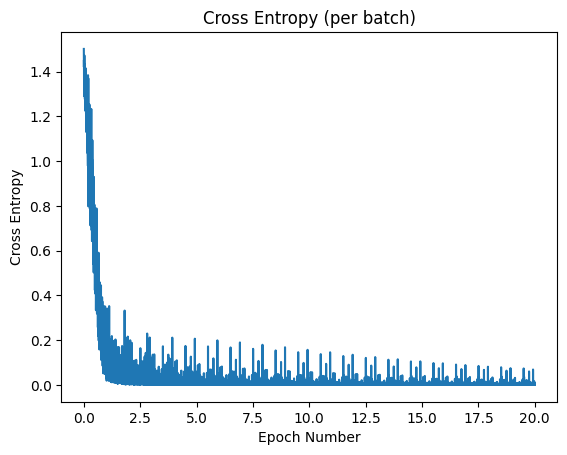

In [106]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [107]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

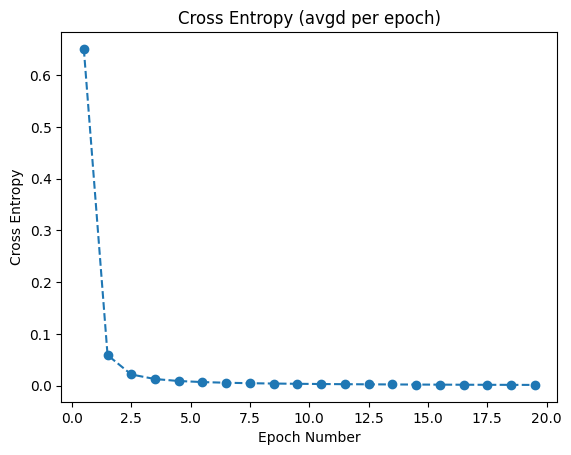

In [108]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

In [110]:
BoldTest_ds[0][1]

tensor([0., 0., 0., 1.], dtype=torch.float64)

In [111]:
y_sample = BoldTest_ds[0][1]
y_sample

tensor([0., 0., 0., 1.], dtype=torch.float64)

In [112]:
x_sample = BoldTest_ds[0][0]
yhat_sample = f(x_sample)
yhat_sample

tensor([-10.4162,  -0.6050,  -5.3036,  13.2470], grad_fn=<SqueezeBackward0>)

In [113]:
torch.argmax(yhat_sample)

tensor(3)

In [114]:
xs, ys = BoldTest_ds[0:100]

In [121]:
ys

tensor([[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0.,

In [134]:
f(xs).argmax(axis=1)

tensor([3, 1, 2, 0, 1, 3, 1, 0, 3, 0, 2, 1, 0, 1, 3, 1, 1, 2, 2, 1, 2, 1, 3, 0,
        2, 1, 2, 0, 3, 3, 2, 3, 0, 3, 2, 1, 1, 1, 2, 3, 2, 1, 0, 0, 1, 2, 3, 1,
        1, 2, 3, 3, 1, 3, 1, 3, 0, 1, 2, 2, 0, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2, 2,
        2, 1, 0, 2, 0, 2, 2, 2, 3, 0, 2, 2, 0, 0, 3, 2, 3, 3, 0, 1, 1, 0, 1, 1,
        3, 0, 0, 3])

In [117]:
yhats = f(xs).argmax(axis=1)

In [127]:
ysArg = ys.argmax(axis=1)

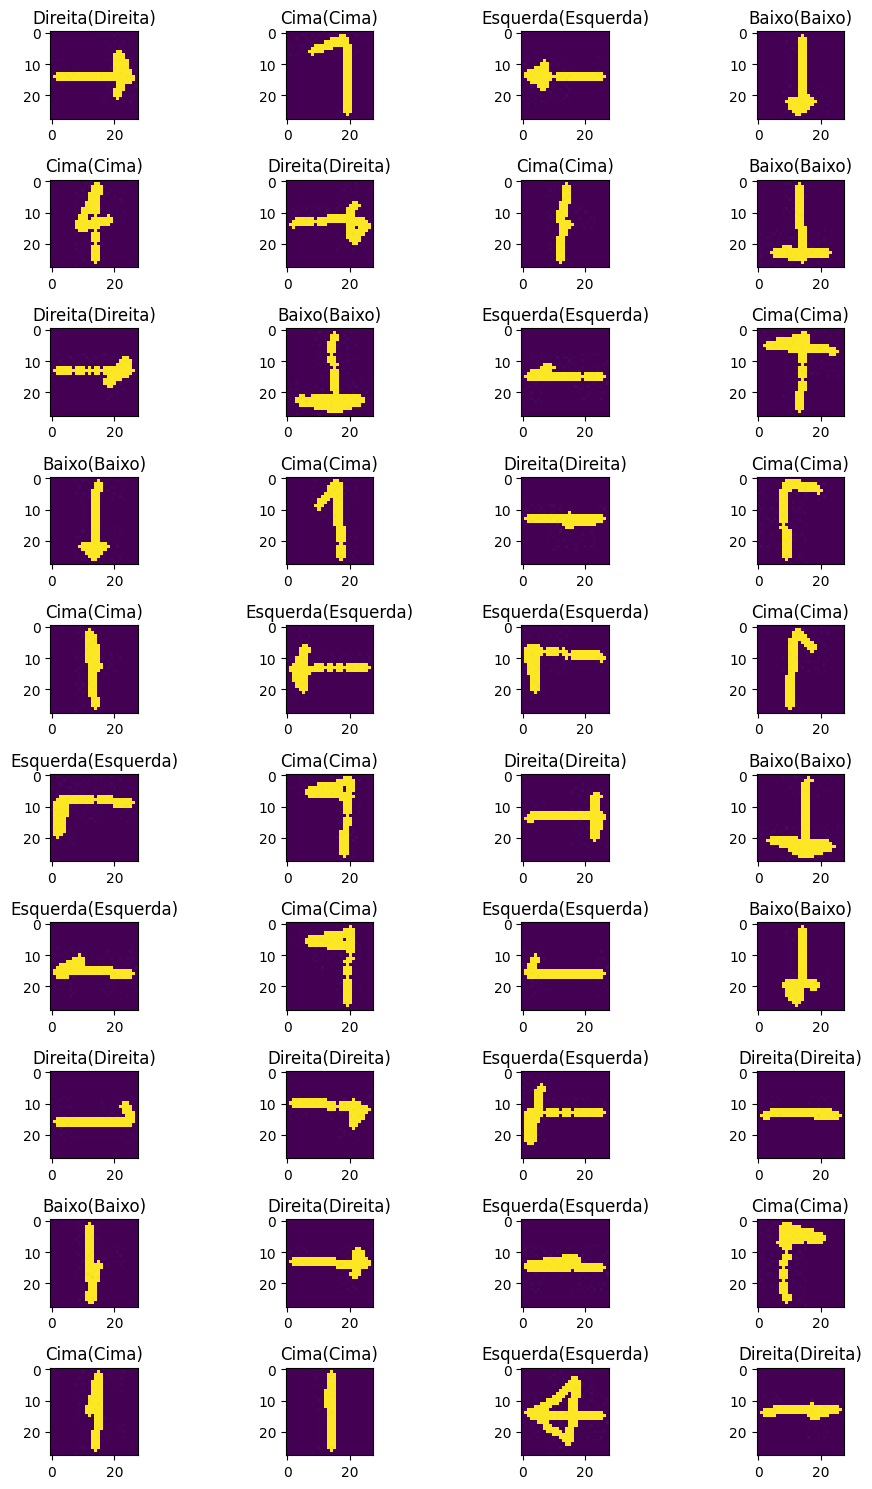

In [128]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    match yhats[i]:
        case 0:
            name = "Baixo"
        case 1:
            name = "Cima"
        case 2:
            name = "Esquerda"
        case 3:
            name = "Direita"
    match ysArg[i]:
        case 0:
            Rname = "Baixo"
        case 1:
            Rname = "Cima"
        case 2:
            Rname = "Esquerda"
        case 3:
            Rname = "Direita"
    plt.title(f'{name}({Rname})')
fig.tight_layout()
plt.show()

In [129]:
xs, ys = BoldTest_ds[:100]
yhats = f(xs).argmax(axis=1)
ysArg = ys.argmax(axis=1)

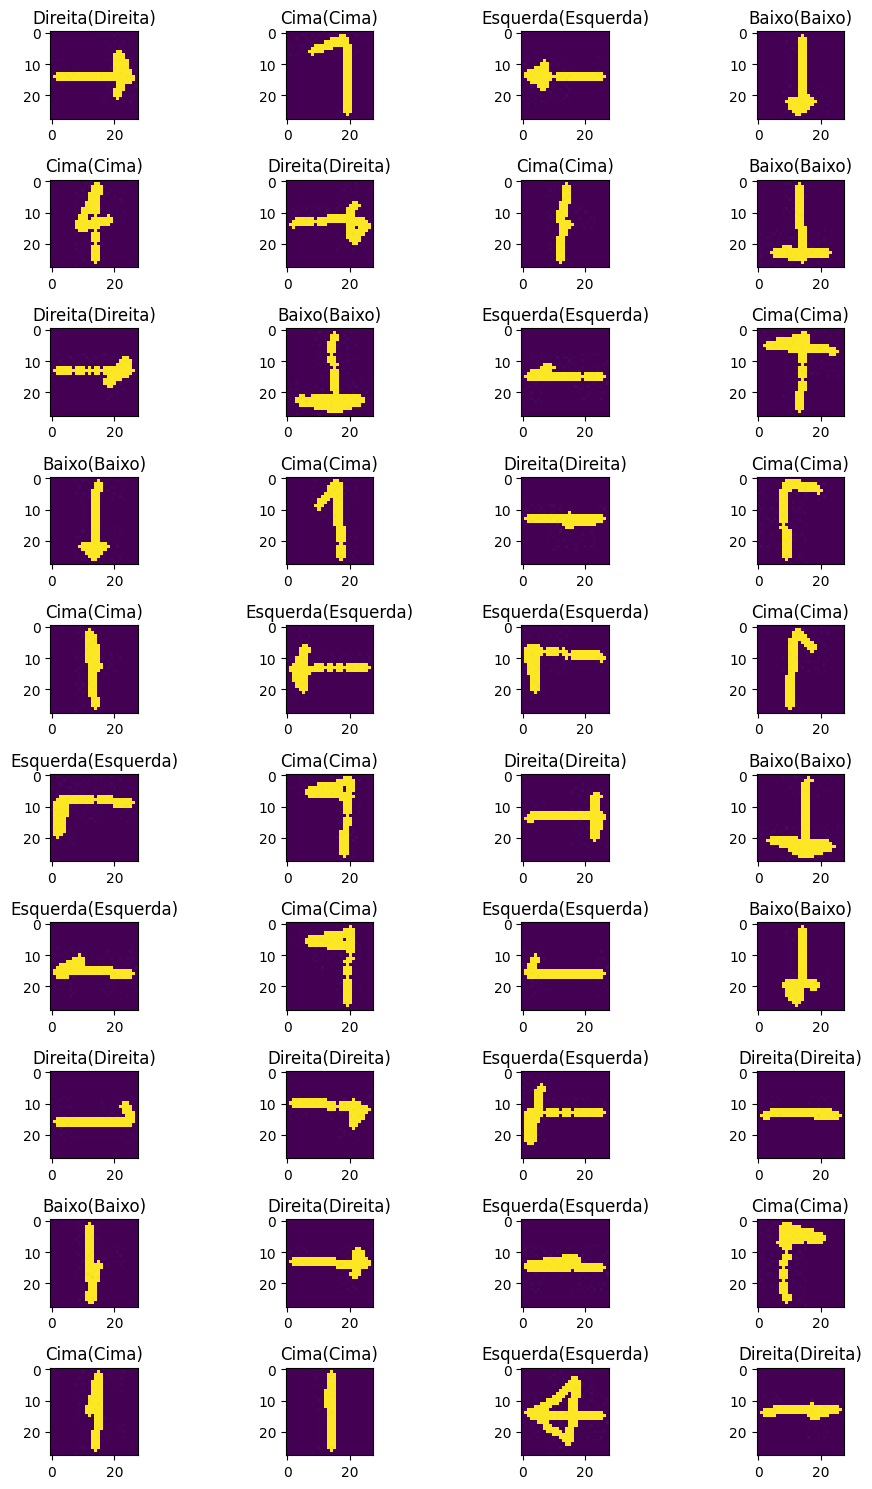

In [130]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    match yhats[i]:
        case 0:
            name = "Baixo"
        case 1:
            name = "Cima"
        case 2:
            name = "Esquerda"
        case 3:
            name = "Direita"
    match ysArg[i]:
        case 0:
            Rname = "Baixo"
        case 1:
            Rname = "Cima"
        case 2:
            Rname = "Esquerda"
        case 3:
            Rname = "Direita"
    plt.title(f'{name}({Rname})')
fig.tight_layout()
plt.show()

In [131]:
print(f)

MyNeuralNet(
  (Matrix1): Linear(in_features=784, out_features=100, bias=True)
  (Matrix2): Linear(in_features=100, out_features=50, bias=True)
  (Matrix3): Linear(in_features=50, out_features=4, bias=True)
  (R): ReLU()
)


In [132]:
torch.save(f.state_dict(), 'RedeNeural1.pth')